In [1]:
import numpy as np
import pandas as pd 
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import matplotlib.pyplot as mp

In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape , test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [6]:
print(train_images[0,5:22,5:22])

[[  0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255]
 [  0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242]
 [  0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56]
 [  0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0]
 [  0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0]
 [  0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0]
 [  0   0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0]
 [  0 

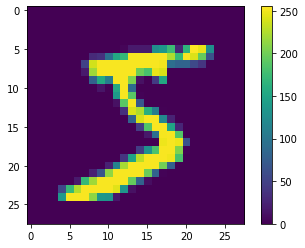

In [7]:
mp.figure()
mp.imshow(train_images[0])
mp.colorbar()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

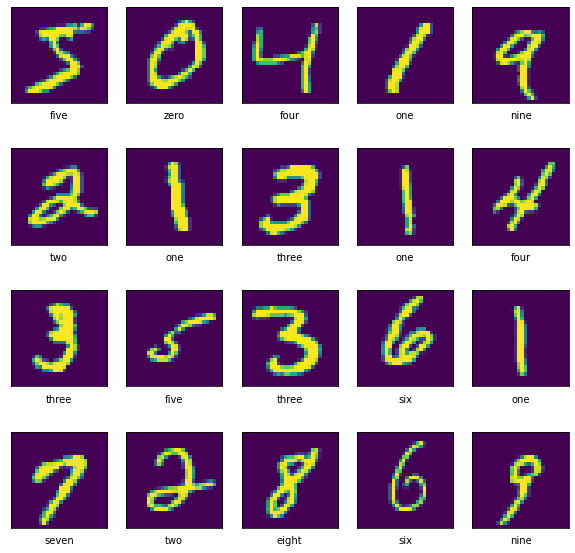

In [9]:
mp.figure(figsize=(10,10))
for i in range(20):
    mp.subplot(4,5, i+1)
    mp.xticks([])
    mp.yticks([])
    mp.grid(False)
    mp.imshow(train_images[i])
    mp.xlabel(class_names[train_labels[i]])

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [12]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )


In [13]:
model.fit(train_images, train_labels, epochs=10, batch_size = 128, verbose= 2, validation_data= (train_images, train_labels) )

Epoch 1/10


2022-09-01 16:31:31.079221: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 - 12s - loss: 0.2263 - accuracy: 0.9309 - val_loss: 0.0634 - val_accuracy: 0.9802 - 12s/epoch - 26ms/step
Epoch 2/10
469/469 - 12s - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0388 - val_accuracy: 0.9876 - 12s/epoch - 25ms/step
Epoch 3/10
469/469 - 12s - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0258 - val_accuracy: 0.9919 - 12s/epoch - 26ms/step
Epoch 4/10
469/469 - 12s - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0216 - val_accuracy: 0.9932 - 12s/epoch - 25ms/step
Epoch 5/10
469/469 - 11s - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0170 - val_accuracy: 0.9949 - 11s/epoch - 24ms/step
Epoch 6/10
469/469 - 11s - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0153 - val_accuracy: 0.9955 - 11s/epoch - 24ms/step
Epoch 7/10
469/469 - 11s - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0127 - val_accuracy: 0.9961 - 11s/epoch - 24ms/step
Epoch 8/10
469/469 - 12s - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0105 - val_accuracy: 0.9973 - 12s/epoch - 25ms/step
Epoch 9/10


In [14]:
loss, accuracy= model.evaluate(test_images, test_labels, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9930


In [15]:
loss * 100

2.1416937932372093

In [16]:
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.29999709129333


1875/1875 [==============================] - 5s 3ms/step
4


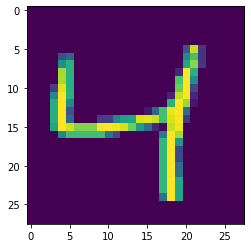

In [17]:
mp.imshow(train_images[2])
prediction = model.predict(train_images)
print(np.argmax(prediction[2]))